# LOGISTIC REGRESSION

# Import Library

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset

In [2]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\New folder\9th, 10th, 11th - logistic, pca\9th, 10th, 11th - logistic, pca\2.LOGISTIC REGRESSION CODE\logit classification.csv")

In [3]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values


# Spliting the dataset into the training set and test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Feature Scalling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


# Training the logistic regression model on the training set 

In [6]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

# Predicting the test set results

In [7]:
y_pred=classifier.predict(x_test)


# Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[57  1]
 [ 5 17]]


# This is to get the Models Accuracy

In [9]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print(ac)

0.925


# This is to get the Classification report


In [10]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95        58\n           1       0.94      0.77      0.85        22\n\n    accuracy                           0.93        80\n   macro avg       0.93      0.88      0.90        80\nweighted avg       0.93      0.93      0.92        80\n'

In [11]:
bias=classifier.score(x_test,y_test)
bias

0.925

In [12]:
variance=classifier.score(x_train,y_train)
variance

0.821875

# Visualing the Training set Results

C:\Users\HP\AppData\Local\Temp\ipykernel_2332\2426965360.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


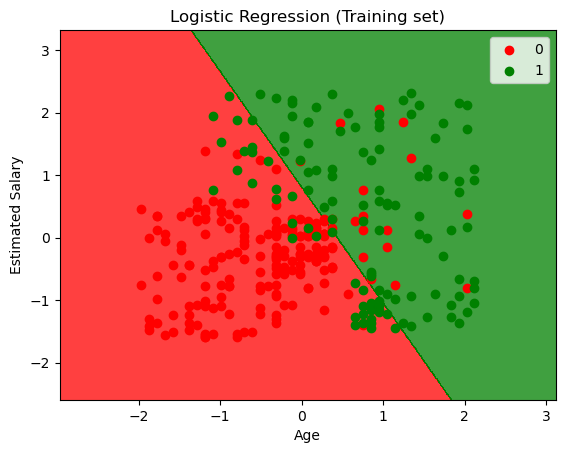

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
